In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [8]:
data = pd.read_csv('SNP0919.csv', index_col = "Date", parse_dates = True)

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-03-09,680.760010,695.270020,672.880005,676.530029,676.530029,7277320000
2009-03-10,679.280029,719.599976,679.280029,719.599976,719.599976,8618330000
2009-03-11,719.590027,731.919983,713.849976,721.359985,721.359985,7287810000
2009-03-12,720.890015,752.630005,714.760010,750.739990,750.739990,7326630000
2009-03-13,751.969971,758.289978,742.460022,756.549988,756.549988,6787090000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000


In [10]:
scaler = MinMaxScaler(feature_range = (0,1))

In [11]:
training_data = scaler.fit_transform(data)

In [12]:
X_train = []
Y_train = []
for i in range (120, 2723): 
    X_train.append(training_data[i-120:i, 0])
    Y_train.append(training_data[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
regressor = tf.keras.Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
82/82 [==============================] - 15s 181ms/step - loss: 0.0290
Epoch 2/100
82/82 [==============================] - 17s 201ms/step - loss: 0.0101
Epoch 3/100
82/82 [==============================] - 17s 207ms/step - loss: 0.0077
Epoch 4/100
82/82 [==============================] - 19s 229ms/step - loss: 0.0064
Epoch 5/100
82/82 [==============================] - 21s 257ms/step - loss: 0.0056
Epoch 6/100
82/82 [==============================] - 18s 214ms/step - loss: 0.0050
Epoch 7/100
82/82 [==============================] - 16s 198ms/step - loss: 0.0046
Epoch 8/100
82/82 [==============================] - 16s 195ms/step - loss: 0.0041
Epoch 9/100
82/82 [==============================] - 16s 196ms/step - loss: 0.0038
Epoch 10/100
82/82 [==============================] - 16s 200ms/step - loss: 0.0036
Epoch 11/100
82/82 [==============================] - 17s 202ms/step - loss: 0.0034
Epoch 12/100
82/82 [==============================] - 17s 207ms/step - loss: 0.0032
E

In [16]:
 test_data = pd.read_csv('^GSPC_YTD.csv', index_col= "Date", parse_dates = True)

In [17]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2020-07-13,3205.080078,3235.320068,3149.429932,3155.219971,3155.219971,4890780000
2020-07-14,3141.110107,3200.949951,3127.659912,3197.520020,3197.520020,4476170000
2020-07-15,3225.979980,3238.280029,3200.760010,3226.560059,3226.560059,4669760000


In [18]:
actual = test_data.iloc[:, 1:2].values

In [19]:
actual

array([[3258.139893],
       [3246.149902],
       [3246.840088],
       [3244.909912],
       [3267.070068],
       [3275.580078],
       [3282.98999 ],
       [3288.129883],
       [3294.25    ],
       [3298.659912],
       [3317.110107],
       [3329.879883],
       [3329.790039],
       [3337.77002 ],
       [3326.879883],
       [3333.179932],
       [3258.850098],
       [3285.780029],
       [3293.469971],
       [3285.909912],
       [3282.330078],
       [3268.439941],
       [3306.919922],
       [3337.580078],
       [3347.959961],
       [3341.419922],
       [3352.26001 ],
       [3375.629883],
       [3381.469971],
       [3385.090088],
       [3380.689941],
       [3375.01001 ],
       [3393.52002 ],
       [3389.149902],
       [3360.76001 ],
       [3259.810059],
       [3246.98999 ],
       [3182.51001 ],
       [3097.070068],
       [2959.719971],
       [3090.959961],
       [3136.719971],
       [3130.969971],
       [3083.040039],
       [2985.929932],
       [28

In [20]:
data_all = pd.concat((data['Open'], test_data['Open']), axis = 0)

In [21]:
data_all

Date
2009-03-09     680.760010
2009-03-10     679.280029
2009-03-11     719.590027
2009-03-12     720.890015
2009-03-13     751.969971
                 ...     
2020-07-13    3205.080078
2020-07-14    3141.110107
2020-07-15    3225.979980
2020-07-16    3208.360107
2020-07-17    3224.209961
Name: Open, Length: 2860, dtype: float64

In [22]:
end = data_all[len(data_all) - len(test_data) - 120:].values

In [23]:
end = end.reshape(-1, 1)

In [24]:
end = scaler.fit_transform(end)

In [25]:
X_test = []
for i in range(120, 257):
    X_test.append(end[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform((predicted) [:,  0])

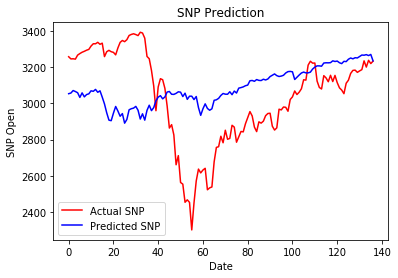

In [26]:
plt.plot(actual, color = 'red', label = 'Actual SNP')
plt.plot(predicted, color = 'blue', label = 'Predicted SNP')
plt.title('SNP Prediction')
plt.xlabel('Date')
plt.ylabel('SNP Open')
plt.legend()
plt.show()